In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## With torch, we can create and process tensors

In [2]:
# Create a number
tensor1 = torch.tensor(4.)
tensor1

tensor(4.)

In [3]:
tensor1.dtype # get the type of tensor

torch.float32

In [4]:
# Create a vector
tensor2 = torch.tensor([2., 3., 6., 9.])
tensor2

tensor([2., 3., 6., 9.])

In [5]:
tensor2.dtype

torch.float32

In [6]:
tensor3 = torch.tensor([2., 9., 3.], dtype=torch.float64)
tensor3

tensor([2., 9., 3.], dtype=torch.float64)

In [7]:
tensor3.dtype

torch.float64

In [8]:
# Create a matrix
tensor3 = torch.tensor([[1., 3], [4., 11.], [6., 5.]])

In [9]:
tensor3.shape

torch.Size([3, 2])

In [10]:
# Create a higher dimension tensor
tensor4 = torch.tensor([
    [
        [1., 2.],
        [4., 1.]
    ],
    [
        [2., 3.],
        [1., 22.]
    ],
    [
        [4., 5],
        [1., 55.]
    ]
])

In [11]:
tensor4.shape

torch.Size([3, 2, 2])

In [12]:
tensor5 = torch.tensor([[[2., 3., 4.], [1., -6., 4.], [2., 4., 6.]], [[6., 3., 3.], [6., -3., 7.], [1., 2., 3.]]])

In [13]:
tensor5.shape

torch.Size([2, 3, 3])

## Tensor Operations and Gradients

In [14]:
t1 = torch.tensor([1., 2., 3.])
t2 = torch.tensor([5., 3., 4.])
# Compute the dot the product
torch.dot(t1, t2)

tensor(23.)

In [15]:
# Multiply vectors element wise
torch.multiply(t1, t2)

tensor([ 5.,  6., 12.])

In [16]:
x = torch.tensor(5.)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(1., requires_grad=True)

x, w, b

(tensor(5.), tensor(2., requires_grad=True), tensor(1., requires_grad=True))

In [17]:
y = w * torch.pow(x, 2) + b

In [18]:
# Calculates the gradients on w and b
y.backward()

/home/rsh/projects/deepl/ml-internship/venv/lib/python3.10/site-packages/torch/autograd/graph.py:744: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11060). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [19]:
print(w.grad) # dy/dw

tensor(25.)


In [20]:
print(b.grad)

tensor(1.)


### Convert from numpy to torch tensor

In [21]:
np_arr = np.array(([1, 2, 3], [5, 6, 1]))

In [22]:
np_arr.shape

(2, 3)

In [23]:
type(np_arr)

numpy.ndarray

In [24]:
torch_tensor = torch.from_numpy(np_arr)

In [25]:
type(torch_tensor)

torch.Tensor

In [26]:
torch_tensor.dtype

torch.int64

## Linear Regression

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv("./data/production.csv")
df

,region,temp,rainfall,humidity,apples,oranges
0,Kanto,73,67,43,56,70
1,Johto,91,88,64,81,101
2,Hoenn,87,134,58,119,133
3,Sinnoh,102,43,37,22,37
4,Unova,69,96,70,103,119


In [29]:
df.shape

(5, 6)

In [30]:
df = df.drop("region", axis=1)

In [31]:
df_data_features = df[["temp", "rainfall", "humidity"]]

In [32]:
df_data_target = df[["apples", "oranges"]]

In [33]:
data_features = df_data_features.to_numpy()
data_targets = df_data_target.to_numpy()

In [34]:
input_features = torch.from_numpy(data_features).float()
targets = torch.from_numpy(data_targets).float()

In [35]:
type(input_features), type(targets)

(torch.Tensor, torch.Tensor)

In [36]:
input_features.shape, targets.shape

(torch.Size([5, 3]), torch.Size([5, 2]))

In [37]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)

In [38]:
def model(x: torch.tensor) -> torch.tensor:
    return x @ w.T + b

In [39]:
def loss_function(t1: torch.tensor, t2: torch.tensor) -> torch.tensor: # mse
    diff = t1 - t2
    return torch.sum((diff * diff) / diff.numel())


In [40]:
def train(w, b, epochs: int=1000, alpha: float=1e-5) -> list:
    losses = []
    for idx in range(epochs):
        preds = model(input_features)
        loss = loss_function(preds, targets)
        losses.append(loss.detach())
        if idx % 5 == 0:
            print(f"The loss is {loss}")
        loss.backward()
        with torch.no_grad():
            w -= w.grad * alpha
            b -= b.grad * alpha
            w.grad.zero_()
            b.grad.zero_()
    return losses

In [41]:
losses = train(w, b)

The loss is 1574.4581298828125
The loss is 450.01446533203125
The loss is 285.5314025878906
The loss is 254.9068145751953
The loss is 243.3081817626953
The loss is 234.7509765625
The loss is 226.98974609375
The loss is 219.69021606445312
The loss is 212.7845916748047
The loss is 206.24375915527344
The loss is 200.04515075683594
The loss is 194.16790771484375
The loss is 188.59307861328125
The loss is 183.30239868164062
The loss is 178.27896118164062
The loss is 173.5070037841797
The loss is 168.97142028808594
The loss is 164.6580810546875
The loss is 160.55419921875
The loss is 156.64698791503906
The loss is 152.9252166748047
The loss is 149.37779235839844
The loss is 145.99440002441406
The loss is 142.76571655273438
The loss is 139.68246459960938
The loss is 136.736328125
The loss is 133.9193878173828
The loss is 131.22402954101562
The loss is 128.6432342529297
The loss is 126.17058563232422
The loss is 123.79998779296875
The loss is 121.52530670166016
The loss is 119.34123229980469
T

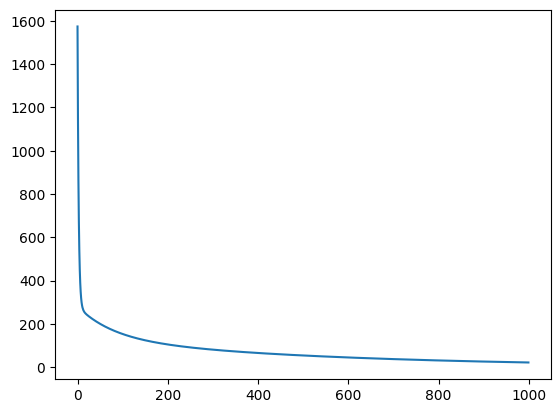

In [42]:
plt.plot(losses)

In [43]:
preds = model(input_features)
loss = loss_function(preds, targets)
print(loss)

tensor(21.3111, grad_fn=<SumBackward0>)


In [44]:
# Compare the preds and groundtruth
preds, targets

(tensor([[ 56.9427,  70.9700],
         [ 83.5545,  96.2164],
         [115.9843, 142.0277],
         [ 20.3912,  39.5531],
         [104.5760, 110.0731]], grad_fn=<AddBackward0>),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.]]))

## Use GPU

In [45]:
# check: nvidia-smi
! nvidia-smi

Mon Jun 24 10:58:20 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.108.03   Driver Version: 510.108.03   CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   57C    P0    16W /  N/A |   1130MiB /  4096MiB |     63%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [46]:


# Check if GPU is available

torch.cuda.is_available()

False

In [47]:
torch.cuda.device_count()

1

In [48]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [49]:
device

device(type='cpu')

In [50]:
data = torch.tensor([1., 2., 3.])
data

tensor([1., 2., 3.])

In [51]:
data = data.to(device)

In [52]:
data

tensor([1., 2., 3.])